***Data Set 1 : Exploration***

General Info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../raw_data/ds_salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [2]:
# Get the unique values in the employee_residence column
unique_residences = data['company_location'].unique()

# Print the unique values
print(unique_residences)

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']


In [3]:
#Group Countries by regions 

# List of countries with more than 30 entries
high_entry_countries = ['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR']

# Create a dictionary mapping each country to its region
country_to_region = {
    'NG': 'Rest_of_the_World', 'GH': 'Rest_of_the_World', 'KE': 'Rest_of_the_World', 'EG': 'Rest_of_the_World', 'DZ': 'Rest_of_the_World',
    'MA': 'Rest_of_the_World', 'ZA': 'Rest_of_the_World', 'AO': 'Rest_of_the_World', 'TN': 'Rest_of_the_World', 'CI': 'Rest_of_the_World',
    'CM': 'Rest_of_the_World', 'ET': 'Rest_of_the_World', 'SN': 'Rest_of_the_World', 'UG': 'Rest_of_the_World', 'TZ': 'Rest_of_the_World',
    'CD': 'Rest_of_the_World', 'ZW': 'Rest_of_the_World', 'MZ': 'Rest_of_the_World', 'NE': 'Rest_of_the_World', 'MW': 'Rest_of_the_World',
    'BJ': 'Rest_of_the_World', 'BF': 'Rest_of_the_World', 'ML': 'Rest_of_the_World', 'GN': 'Rest_of_the_World', 'TD': 'Rest_of_the_World',
    'SO': 'Rest_of_the_World', 'BI': 'Rest_of_the_World', 'LS': 'Rest_of_the_World', 'ER': 'Rest_of_the_World', 'LY': 'Rest_of_the_World',
    'NA': 'Rest_of_the_World', 'GQ': 'Rest_of_the_World', 'GW': 'Rest_of_the_World', 'SS': 'Rest_of_the_World', 'GA': 'Rest_of_the_World',
    'SL': 'Rest_of_the_World', 'CG': 'Rest_of_the_World', 'SZ': 'Rest_of_the_World', 'RE': 'Rest_of_the_World', 'ST': 'Rest_of_the_World',
    'YT': 'Rest_of_the_World', 'SC': 'Rest_of_the_World', 'ZM': 'Rest_of_the_World', 'BW': 'Rest_of_the_World', 'CV': 'Rest_of_the_World',
    'MU': 'Rest_of_the_World', 'KM': 'Rest_of_the_World', 'GM': 'Rest_of_the_World', 'GW': 'Rest_of_the_World', 'TG': 'Rest_of_the_World',
    'BJ': 'Rest_of_the_World', 'AO': 'Rest_of_the_World', 'MW': 'Rest_of_the_World', 'ZW': 'Rest_of_the_World', 'CD': 'Rest_of_the_World',

    'HK': 'Rest_of_Asia', 'SG': 'Rest_of_Asia', 'TH': 'Rest_of_Asia', 'VN': 'Rest_of_Asia', 'MY': 'Rest_of_Asia',
    'PH': 'Rest_of_Asia', 'ID': 'Rest_of_Asia', 'JP': 'Rest_of_Asia', 'CN': 'Rest_of_Asia', 'KR': 'Rest_of_Asia',
    'TW': 'Rest_of_Asia', 'PK': 'Rest_of_Asia', 'BD': 'Rest_of_Asia', 'LK': 'Rest_of_Asia',
    'NP': 'Rest_of_Asia', 'MM': 'Rest_of_Asia', 'KH': 'Rest_of_Asia', 'BN': 'Rest_of_Asia', 'TL': 'Rest_of_Asia',
    'MN': 'Rest_of_Asia', 'UZ': 'Rest_of_Asia', 'TM': 'Rest_of_Asia', 'KG': 'Rest_of_Asia', 'TJ': 'Rest_of_Asia',
    'AZ': 'Rest_of_Asia', 'GE': 'Rest_of_Asia', 'AM': 'Rest_of_Asia', 'SY': 'Rest_of_Asia', 'IQ': 'Rest_of_Asia',
    'LB': 'Rest_of_Asia', 'JO': 'Rest_of_Asia', 'PS': 'Rest_of_Asia', 'KW': 'Rest_of_Asia', 'SA': 'Rest_of_Asia',
    'OM': 'Rest_of_Asia', 'YE': 'Rest_of_Asia', 'AE': 'Rest_of_Asia', 'QA': 'Rest_of_Asia', 'BH': 'Rest_of_Asia',
    'IR': 'Rest_of_Asia', 'AF': 'Rest_of_Asia', 'TL': 'Rest_of_Asia', 'MV': 'Rest_of_Asia', 'BT': 'Rest_of_Asia',

    'AR': 'Latin_America', 'BO': 'Latin_America', 'BR': 'Latin_America', 'CL': 'Latin_America', 
    'CO': 'Latin_America', 'EC': 'Latin_America', 'FK': 'Latin_America', 'GF': 'Latin_America', 
    'GY': 'Latin_America', 'PE': 'Latin_America', 'PY': 'Latin_America', 'SR': 'Latin_America', 
    'UY': 'Latin_America', 'VE': 'Latin_America', 'MX': 'Latin_America', 'CR': 'Latin_America', 
    'DO': 'Latin_America', 'GT': 'Latin_America', 'HN': 'Latin_America', 'NI': 'Latin_America', 
    'PA': 'Latin_America', 'SV': 'Latin_America', 'BZ': 'Latin_America', 'BB': 'Latin_America',
    'CU': 'Latin_America', 'JM': 'Latin_America', 'HT': 'Latin_America', 'TT': 'Latin_America', 
    'BS': 'Latin_America', 'LC': 'Latin_America', 'GD': 'Latin_America', 'AG': 'Latin_America', 
    'DM': 'Latin_America', 'VC': 'Latin_America', 'KN': 'Latin_America',

    'AU': 'Rest_of_the_World', 'FJ': 'Rest_of_the_World', 'KI': 'Rest_of_the_World', 'MH': 'Rest_of_the_World', 'FM': 'Rest_of_the_World', 
    'NR': 'Rest_of_the_World', 'NZ': 'Rest_of_the_World', 'PW': 'Rest_of_the_World', 'PG': 'Rest_of_the_World', 'WS': 'Rest_of_the_World', 
    'SB': 'Rest_of_the_World', 'TO': 'Rest_of_the_World', 'TV': 'Rest_of_the_World', 'VU': 'Rest_of_the_World',

    'AT': 'Rest_of_Europe', 'BE': 'Rest_of_Europe', 'BG': 'Rest_of_Europe', 'HR': 'Rest_of_Europe', 'CY': 'Rest_of_Europe', 
    'CZ': 'Rest_of_Europe', 'DK': 'Rest_of_Europe', 'EE': 'Rest_of_Europe', 'FI': 'Rest_of_Europe', 
    'GR': 'Rest_of_Europe', 'HU': 'Rest_of_Europe', 'IS': 'Rest_of_Europe', 'IE': 'Rest_of_Europe', 
    'IT': 'Rest_of_Europe', 'LV': 'Rest_of_Europe', 'LT': 'Rest_of_Europe', 'LU': 'Rest_of_Europe', 'MT': 'Rest_of_Europe', 
    'NL': 'Rest_of_Europe', 'NO': 'Rest_of_Europe', 'PL': 'Rest_of_Europe', 'PT': 'Rest_of_Europe', 'RO': 'Rest_of_Europe', 
    'RU': 'Rest_of_Europe', 'SK': 'Rest_of_Europe', 'SI': 'Rest_of_Europe', 'SE': 'Rest_of_Europe', 
    'CH': 'Rest_of_Europe', 'UA': 'Rest_of_Europe', 'RS': 'Rest_of_Europe', 'MD': 'Rest_of_Europe', 
    'ME': 'Rest_of_Europe', 'MK': 'Rest_of_Europe', 'AL': 'Rest_of_Europe', 'BA': 'Rest_of_Europe', 'XK': 'Rest_of_Europe', 
    'BY': 'Rest_of_Europe', 'AD': 'Rest_of_Europe', 'MC': 'Rest_of_Europe', 'SM': 'Rest_of_Europe', 'LI': 'Rest_of_Europe', 
    'VA': 'Rest_of_Europe'
}

# Ensure countries with high entries remain their own category
for country in high_entry_countries:
    country_to_region[country] = country

# Function to map company location to regions or keep it unchanged for high entry countries
def map_location(location):
    if location in high_entry_countries:
        return location
    return country_to_region.get(location, 'Rest_of_the_World')  # Default to 'Rest_of_the_World' if not found in the dictionary

# Create the new column company_location_grouped
data['company_location_grouped'] = data['company_location'].apply(map_location)

# Print the updated DataFrame
print(data)

# Count the number of entries for each region and high-entry country
region_counts = data['company_location_grouped'].value_counts()

print(region_counts)

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

In [4]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size',
       'company_location_grouped'],
      dtype='object')

In [5]:
data.work_year.value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [6]:
data.dtypes

work_year                    int64
experience_level            object
employment_type             object
job_title                   object
salary                       int64
salary_currency             object
salary_in_usd                int64
employee_residence          object
remote_ratio                 int64
company_location            object
company_size                object
company_location_grouped    object
dtype: object

***Salaries***

In [7]:
data ["salary_in_usd"].max() #Largest Salary 30Million
top_10_salaries = data['salary_in_usd'].nlargest(10)
top_10_salaries
data ["salary_in_usd"].median() # median is 135000

135000.0

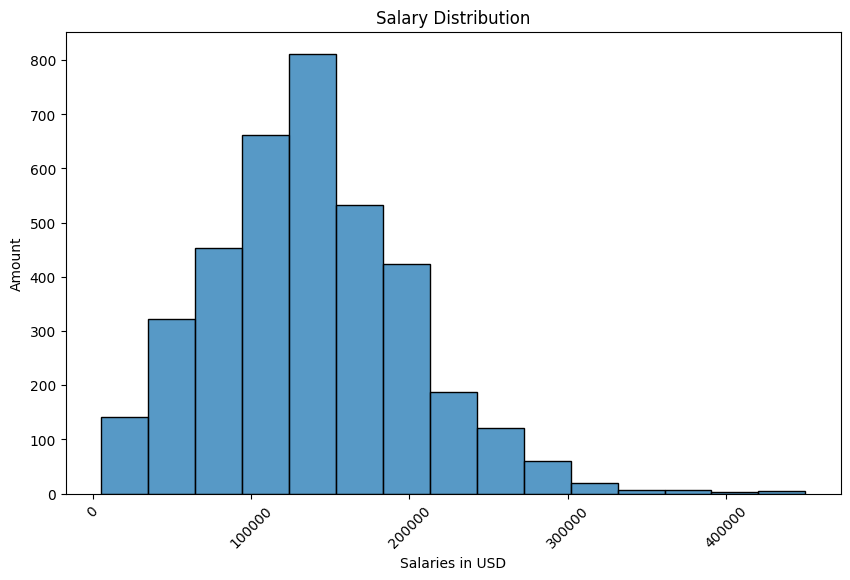

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data["salary_in_usd"], bins=15)
plt.xticks(rotation=45)

plt.title('Salary Distribution')
plt.xlabel('Salaries in USD')
plt.ylabel('Amount')

plt.show()

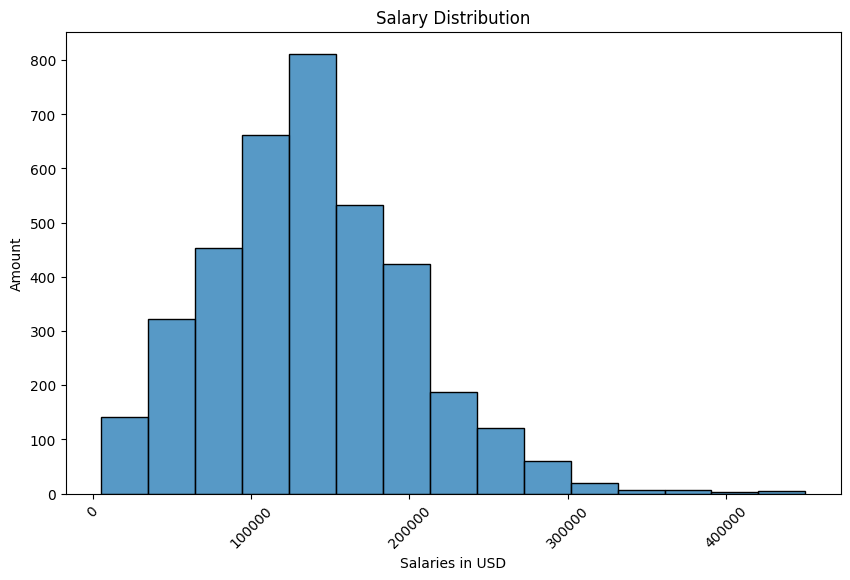

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data["salary_in_usd"], bins=15)
plt.xticks(rotation=45)

plt.title('Salary Distribution')
plt.xlabel('Salaries in USD')
plt.ylabel('Amount')

plt.show()

***Job Titles***

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

job_titles = data["job_title"].unique()
job_titles

# keywords
keywords = ["Scientist",  "Machine", "Analyst", "AI", "BI", "Engineer", "Research", "Analytics", "Vision", "Architect", "Developer", "Manager", "Head", "Lead", "Cloud", "Specialist", "Principal"]

# create dictionary
clusters = {keyword: [] for keyword in keywords}
clusters["Others"] = []

# assign job titles
for title in job_titles:
    matched = False
    for keyword in keywords:
        if keyword.lower() in title.lower():
            clusters[keyword].append(title)
            matched = True
    if not matched:
        clusters["Others"].append(title)

# Ausgabe der Cluster
for keyword, titles in clusters.items():
    print(f"\nCluster für '{keyword}':")
    for title in titles:
        print(title)


Cluster für 'Scientist':
Principal Data Scientist
Data Scientist
Applied Scientist
Research Scientist
Applied Data Scientist
Machine Learning Scientist
AI Scientist
Applied Machine Learning Scientist
Lead Data Scientist
Data Scientist Lead
Product Data Scientist
Staff Data Scientist

Cluster für 'Machine':
Machine Learning Engineer
Applied Machine Learning Engineer
Machine Learning Researcher
Machine Learning Scientist
Applied Machine Learning Scientist
Machine Learning Infrastructure Engineer
Machine Learning Software Engineer
Machine Learning Research Engineer
Machine Learning Developer
Principal Machine Learning Engineer
Machine Learning Manager
Lead Machine Learning Engineer
Head of Machine Learning

Cluster für 'Analyst':
Data Analyst
Data Quality Analyst
Compliance Data Analyst
Business Data Analyst
Staff Data Analyst
Lead Data Analyst
Financial Data Analyst
BI Analyst
BI Data Analyst
Insight Analyst
Product Data Analyst
Data Operations Analyst
Marketing Data Analyst
Principal D

*** Charts: Countries, Job titles etc.  ***

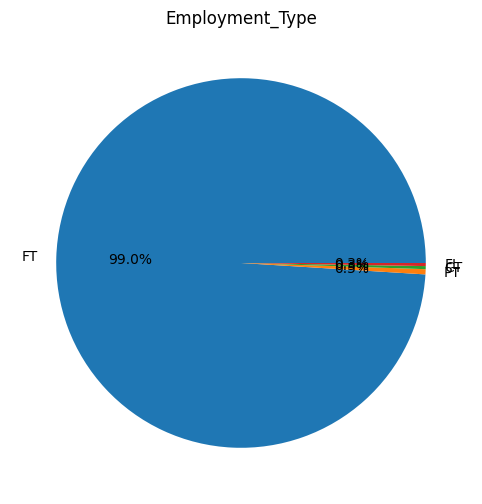

employment_type
FT    99.014647
PT     0.452730
CT     0.266312
FL     0.266312
Name: proportion, dtype: float64

In [11]:
employment_type_percentages = data["employment_type"].value_counts(normalize=True) * 100


plt.figure(figsize=(10,6))
plt.pie(employment_type_percentages, labels=employment_type_percentages.index, autopct='%1.1f%%')
plt.title("Employment_Type")
plt.show()

employment_type_percentages

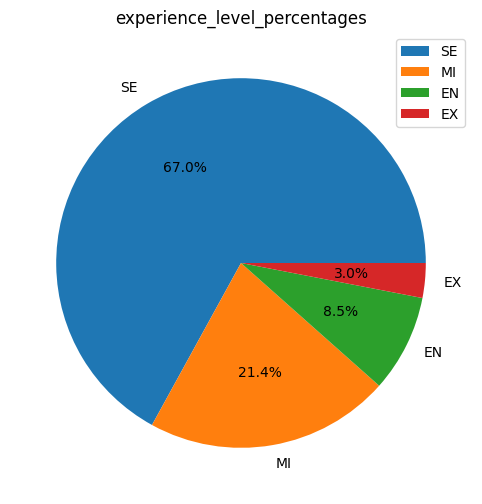

experience_level
SE    67.003995
MI    21.438083
EN     8.521971
EX     3.035952
Name: proportion, dtype: float64

In [12]:
experience_level_percentages = data["experience_level"].value_counts(normalize=True) * 100


plt.figure(figsize=(10,6))
plt.pie(experience_level_percentages, labels=experience_level_percentages.index, autopct='%1.1f%%')
plt.title("experience_level_percentages")
plt.legend()
plt.show()

experience_level_percentages

***Cleaning, Outliers etc...***

<Axes: >

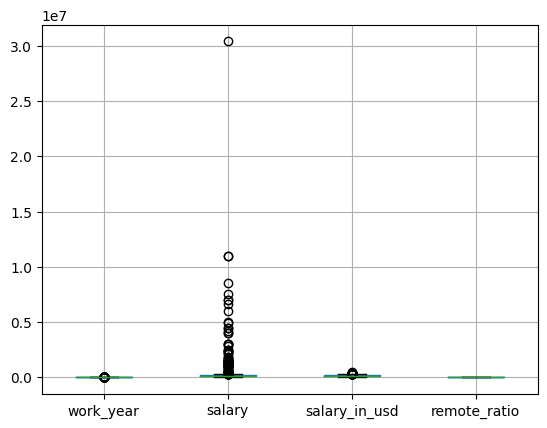

In [13]:
# data.isnull().sum() --> no missing data!
data.boxplot() # Salary has outliers. 

In [14]:
data.duplicated().sum() # Are these really duplicates? What to do? 

1171

***Scaling the data***

In [15]:
X = data.drop(columns=["salary", "salary_currency", "salary_in_usd"])
y = data ["salary_in_usd"]
X

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,company_location_grouped
0,2023,SE,FT,Principal Data Scientist,ES,100,ES,L,ES
1,2023,MI,CT,ML Engineer,US,100,US,S,US
2,2023,MI,CT,ML Engineer,US,100,US,S,US
3,2023,SE,FT,Data Scientist,CA,100,CA,M,CA
4,2023,SE,FT,Data Scientist,CA,100,CA,M,CA
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,US,100,US,L,US
3751,2021,MI,FT,Principal Data Scientist,US,100,US,L,US
3752,2020,EN,FT,Data Scientist,US,100,US,S,US
3753,2020,EN,CT,Business Data Analyst,US,100,US,L,US


We only scale X, there only the column remote_ratio contains numerical values (100,   0,  50). If scaling is necessary depends on the ML model. 

We don't scale y.... But in case we need to: salary contains outliers, therefore Robust Scaler is the best choice. 

Sjoerd: 
- work_year how to treat it?
- encode all columns and then scale them toghether, or create two pipelines? 


***Encoding the data***


Colums without order: 
- One hot encoder
- Job_title, employee_residence,company_location

Columns with order: 
- work_year, experience_level, employment_type, remote_ratio, company_size
- size mapping, e.g. for company size: 
size_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5}

--> After Encoding; Setup a preprocessing pipeline, to encode all features. 

In [16]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Columns to encode
encode_columns = ["experience_level", "employment_type", "job_title", "employee_residence"]

# Instantiate Encoder
ohe = OneHotEncoder()

# Fit and transform Encoder
encoded_columns = ohe.fit_transform(data[encode_columns]).toarray()

# create dataframe
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(encode_columns))

# drop original columns from data
data_encoded = data.drop(columns=encode_columns)

# add encoded columns to data
data_encoded = pd.concat([data, encoded_df], axis=1)
data_encoded


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,employee_residence_SG,employee_residence_SI,employee_residence_SK,employee_residence_TH,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_UZ,employee_residence_VN
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


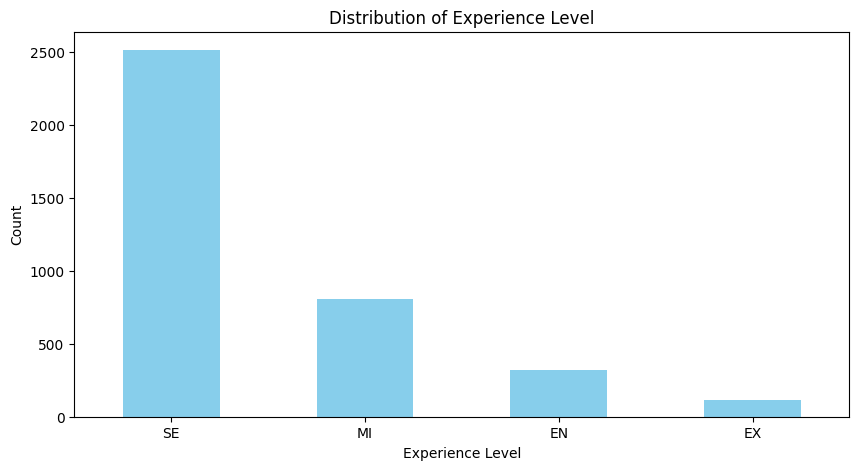

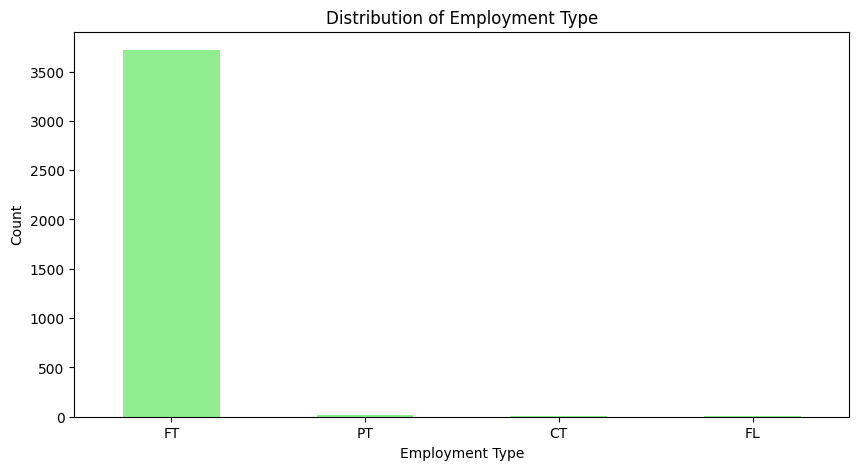

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the distribution of the experience_level column
plt.figure(figsize=(10, 5))
experience_counts = data['experience_level'].value_counts()
experience_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plotting the distribution of the employment_type column
plt.figure(figsize=(10, 5))
employment_counts = data['employment_type'].value_counts()
employment_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


/tmp/ipykernel_26183/671743181.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entry_level_data['salary_range'] = pd.cut(entry_level_data['salary'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_26183/671743181.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette='pastel')


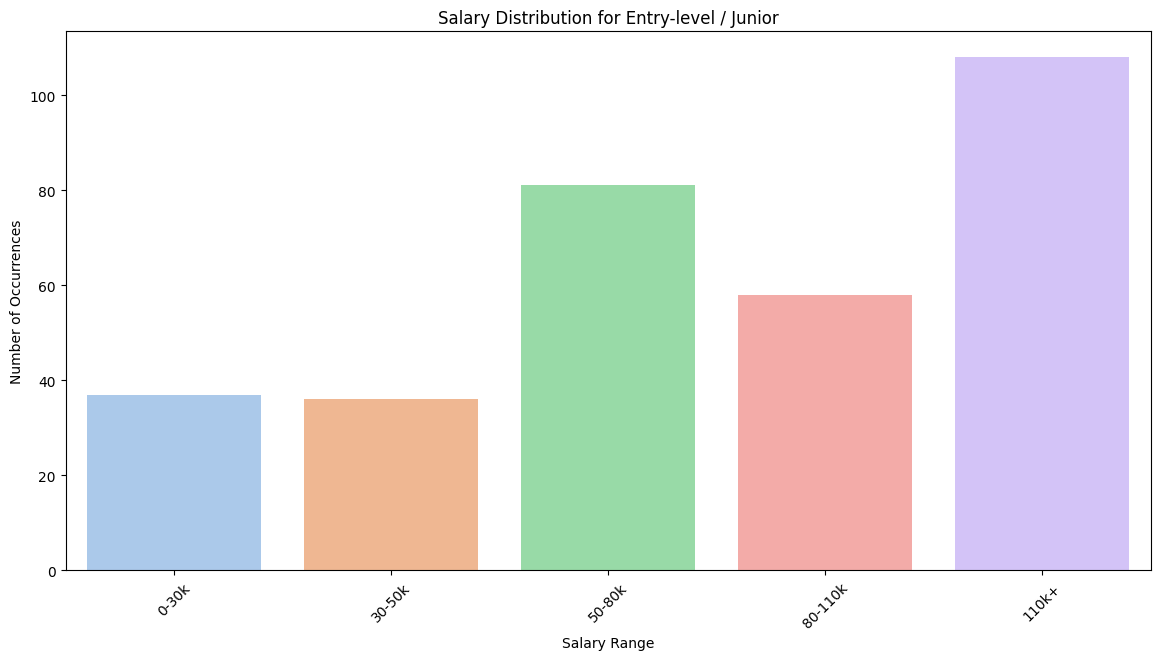

In [18]:
# Filter the dataset for Entry-level / Junior (EN)
entry_level_data = data[data['experience_level'] == 'EN']

# Define custom salary ranges (bins) and labels
bins = [0, 30000, 50000, 80000, 110000, float('inf')]
labels = ['0-30k', '30-50k', '50-80k', '80-110k', '110k+']

# Bin the salary data into the defined ranges
entry_level_data['salary_range'] = pd.cut(entry_level_data['salary'], bins=bins, labels=labels, right=False)

# Count the occurrences of each salary range
salary_range_counts = entry_level_data['salary_range'].value_counts().sort_index()

# Plotting the number of occurrences of each salary range for Entry-level / Junior using a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette='pastel')
plt.title('Salary Distribution for Entry-level / Junior')
plt.xlabel('Salary Range')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

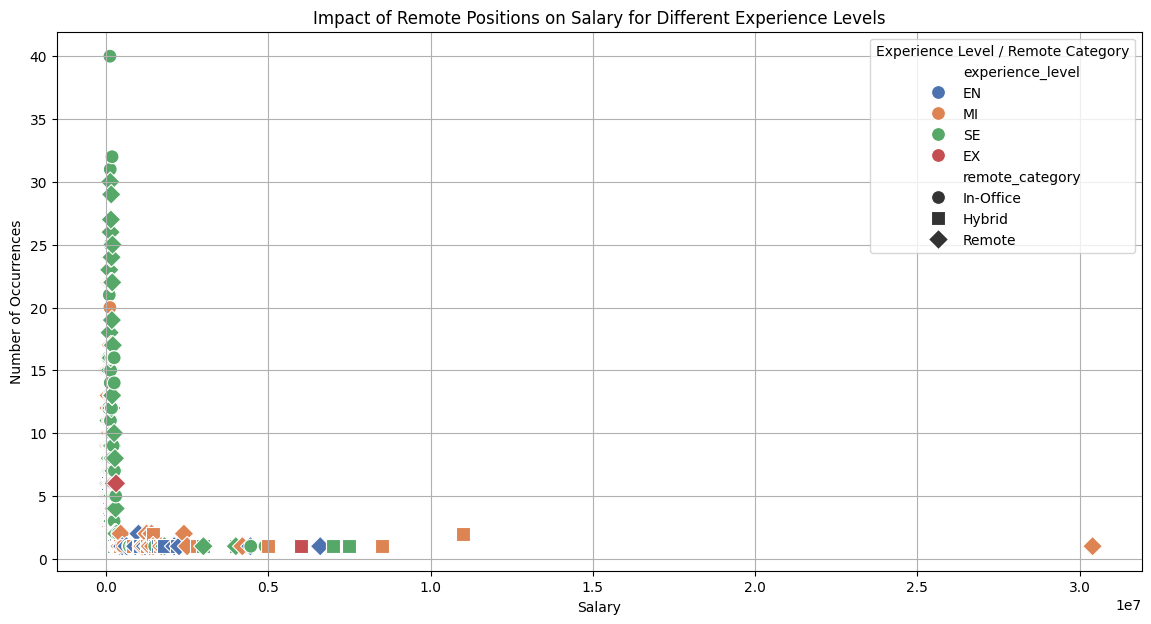

In [19]:
# Define the function to categorize remote ratios
def categorize_remote_ratio(ratio):
    if ratio == 0:
        return 'In-Office'
    elif ratio == 100:
        return 'Remote'
    else:
        return 'Hybrid'

# Apply the function to create a new 'remote_category' column
data['remote_category'] = data['remote_ratio'].apply(categorize_remote_ratio)

# Count the occurrences of each salary for each experience level and remote category
salary_counts = data.groupby(['salary', 'experience_level', 'remote_category']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(14, 7))
sns.scatterplot(
    x='salary', 
    y='count', 
    hue='experience_level', 
    style='remote_category', 
    data=salary_counts, 
    palette='deep', 
    markers=['o', 's', 'D'],  # Circle, square, diamond markers
    s=100  # Marker size
)

plt.title('Impact of Remote Positions on Salary for Different Experience Levels')
plt.xlabel('Salary')
plt.ylabel('Number of Occurrences')
plt.legend(title='Experience Level / Remote Category')
plt.grid(True)
plt.show()

In [20]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size',
       'company_location_grouped', 'remote_category'],
      dtype='object')

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
BS       1
IR       1
CR       1
AL       1
BA       1
Name: count, Length: 72, dtype: int64


/tmp/ipykernel_26183/2799511904.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


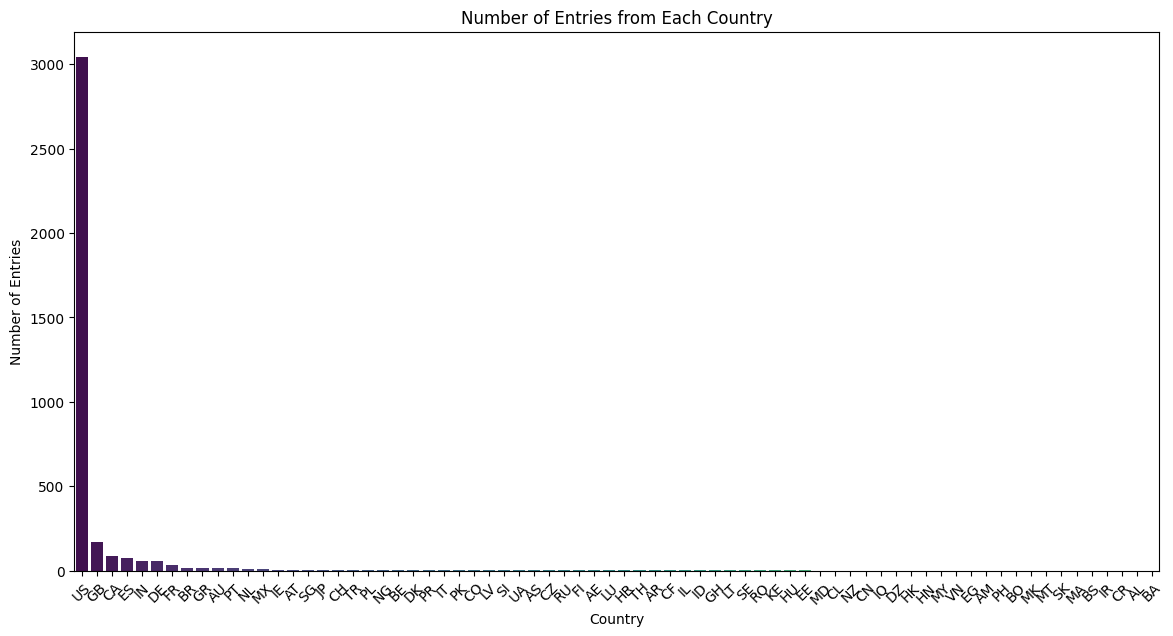

In [21]:
# Count the number of entries for each country
country_counts = data['company_location'].value_counts()

# Display the counts (optional)
print(country_counts)

# Set the figure size
plt.figure(figsize=(14, 7))

# Create a bar plot of the number of entries for each country
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Set plot title and labels
plt.title('Number of Entries from Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Display the plot
plt.show()

In [22]:
country_counts.head(15)

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
GR      14
AU      14
PT      14
NL      13
MX      10
IE       7
AT       6
Name: count, dtype: int64

In [23]:
# Create a boolean mask where employee_residence is different from company_location
mismatch_mask = data['employee_residence'] != data['company_location']

# Count the number of mismatches
mismatch_count = mismatch_mask.sum()

# Display the count of mismatches
print(f'Number of entries with different employee residence and company location: {mismatch_count}')

Number of entries with different employee residence and company location: 96


/tmp/ipykernel_26183/2736480727.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mismatch Type', y='Count', data=mismatch_data, palette='viridis')


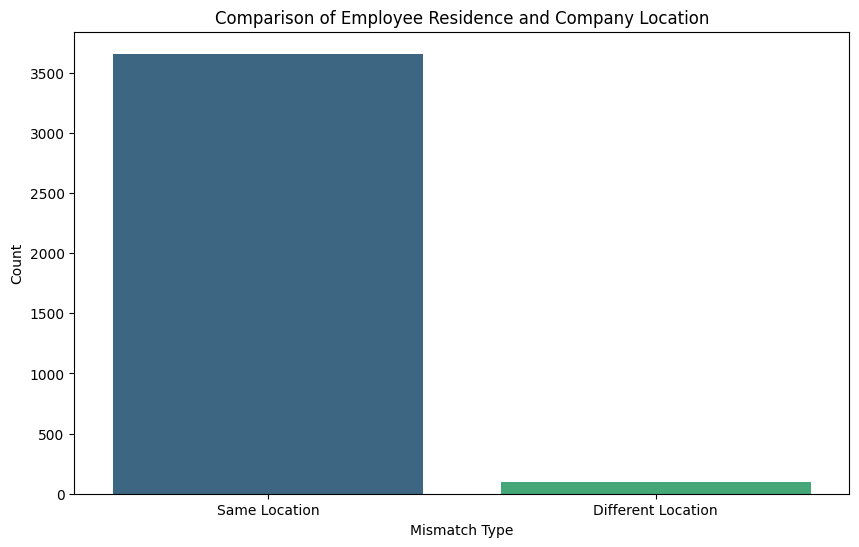

In [24]:
# Create a DataFrame with mismatch counts
mismatch_data = pd.DataFrame({
    'Mismatch Type': ['Same Location', 'Different Location'],
    'Count': [len(data) - mismatch_count, mismatch_count]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Mismatch Type', y='Count', data=mismatch_data, palette='viridis')
plt.title('Comparison of Employee Residence and Company Location')
plt.xlabel('Mismatch Type')
plt.ylabel('Count')
plt.show()

In [25]:
# Define categories based on the criteria
def categorize_jobs(row):
    if row['remote_ratio'] == 0:
        return '0% Remote'
    elif row['remote_ratio'] > 0 and row['employee_residence'] == row['company_location']:
        return 'Hybrid/Remote - Same Country'
    else:
        return 'Hybrid/Remote - Different Country'

# Apply the function to create a new 'job_category' column
data['job_category'] = data.apply(categorize_jobs, axis=1)

# Count the number of entries for each category
category_counts = data['job_category'].value_counts()

# Display the counts (optional)
print(category_counts)

job_category
0% Remote                            1923
Hybrid/Remote - Same Country         1743
Hybrid/Remote - Different Country      89
Name: count, dtype: int64


/tmp/ipykernel_26183/226202652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


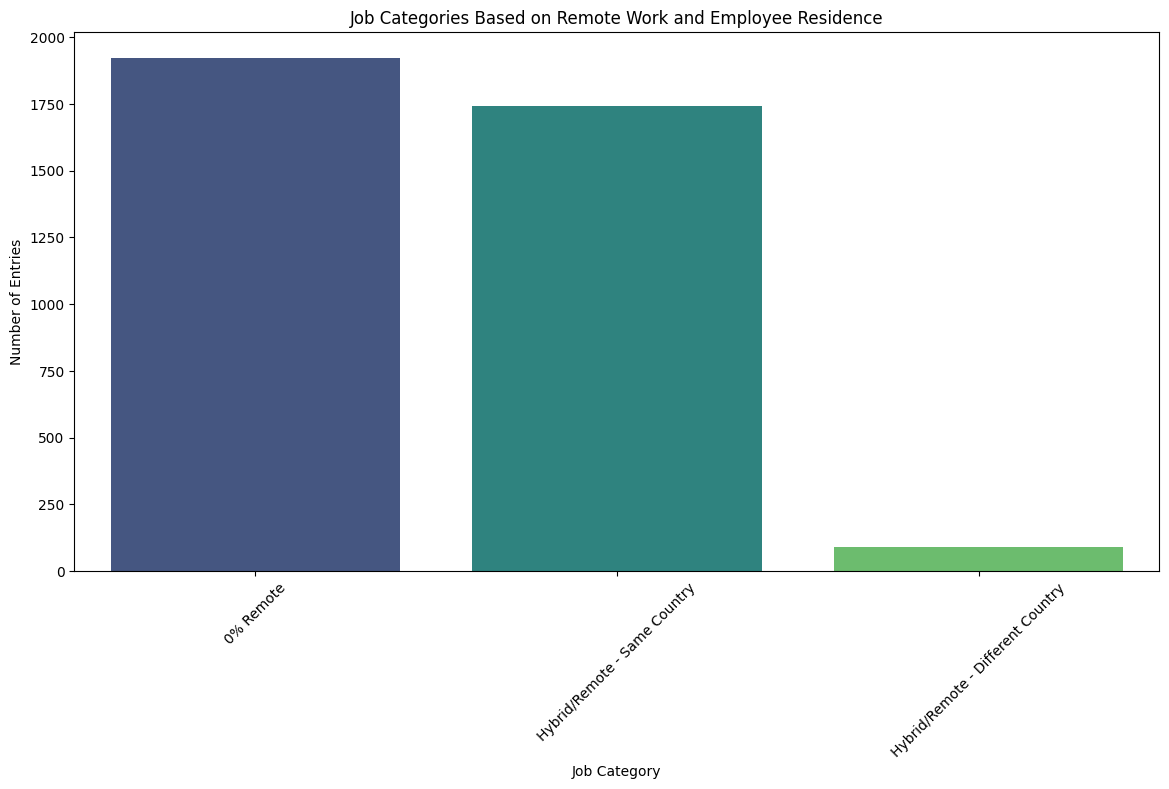

In [26]:
# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Job Categories Based on Remote Work and Employee Residence')
plt.xlabel('Job Category')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [27]:
# Loading Dataset 2

import pandas as pd

# Load the data from the specified path
data_path = "/home/raphaelrousseau/code/datschman/DataScientist/raw_data/data_cleaned_2021.csv"
data2 = pd.read_csv(data_path)

# Display the first few rows of the data to ensure it's loaded correctly
print(data2['job_title_sim'])


0       data scientist
1       data scientist
2       data scientist
3       data scientist
4       data scientist
            ...       
737    other scientist
738      data engineer
739    other scientist
740     data scientist
741    other scientist
Name: job_title_sim, Length: 742, dtype: object


In [28]:
# List of skills columns
skills_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
                  'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

# Select relevant columns for clustering
data_for_clustering = data2[['Avg Salary(K)'] + skills_columns]

# Display the selected columns
print(data_for_clustering.head())

   Avg Salary(K)  Python  spark  aws  excel  sql  sas  keras  pytorch  scikit  \
0           72.0       1      0    0      1    0    1      0        0       0   
1           87.5       1      0    0      0    0    0      0        0       0   
2           85.0       1      1    0      1    1    1      0        0       0   
3           76.5       1      0    0      0    0    0      0        0       0   
4          114.5       1      0    0      1    1    1      0        0       0   

   tensor  hadoop  tableau  bi  flink  mongo  google_an  
0       0       0        1   1      0      0          0  
1       0       0        0   0      0      0          0  
2       0       0        0   0      0      0          0  
3       0       0        0   0      0      0          0  
4       0       0        0   0      0      0          0  


In [29]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_for_clustering)

# Convert the normalized data back to a DataFrame for easier handling
data_normalized_df = pd.DataFrame(data_normalized, columns=data_for_clustering.columns)


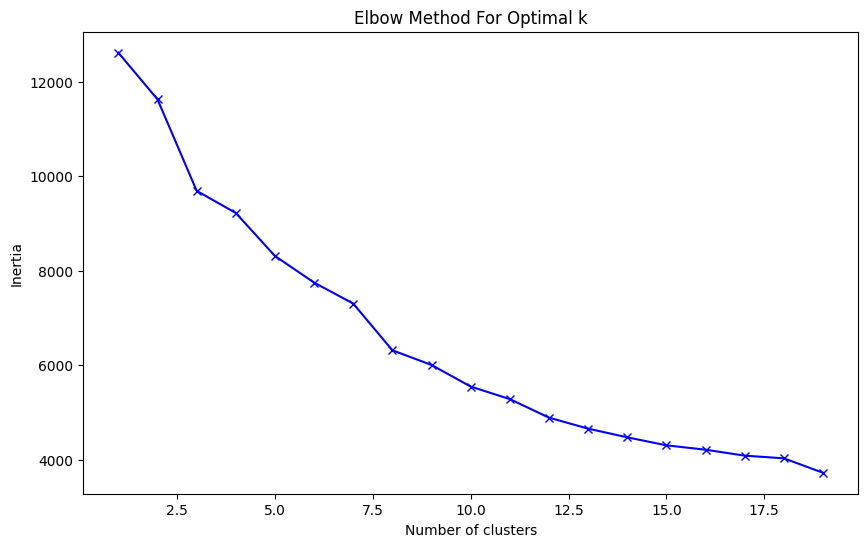

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of number of clusters to try
K = range(1, 20)

# Initialize an empty list to store inertia values
inertia = []

# Loop through different values of k
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

# Plot inertia values vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [31]:
from sklearn.cluster import KMeans

# Perform K-Means clustering with 12 clusters
optimal_clusters = 8
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data2['cluster'] = kmeans.fit_predict(data_normalized_df)

# Display the cluster assignment
print(data2['cluster'].value_counts())


cluster
3    283
0    229
1    119
4     33
5     29
2     26
6     13
7     10
Name: count, dtype: int64


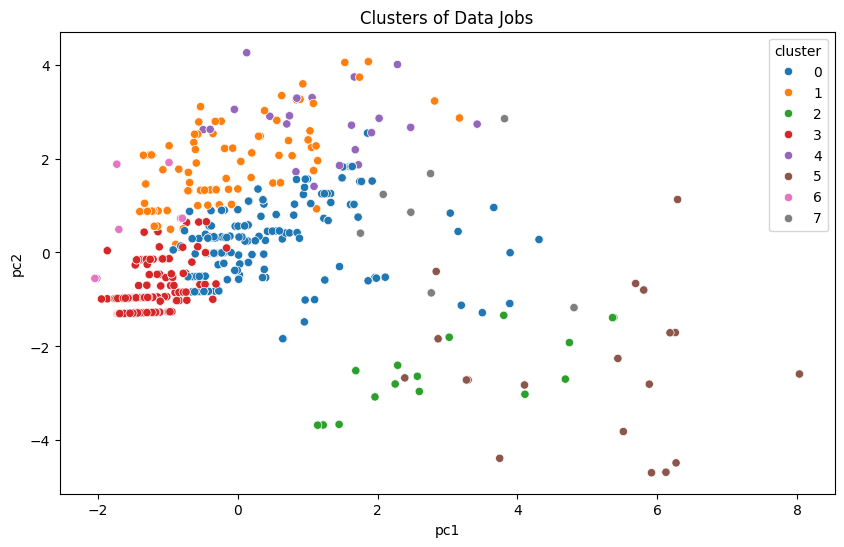

In [32]:
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Trying to cluster jobs by skills and salaries

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_normalized)
data2['pc1'] = principal_components[:, 0]
data2['pc2'] = principal_components[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pc1', y='pc2', hue='cluster', data=data2, palette='tab10')
plt.title('Clusters of Data Jobs')
plt.show()

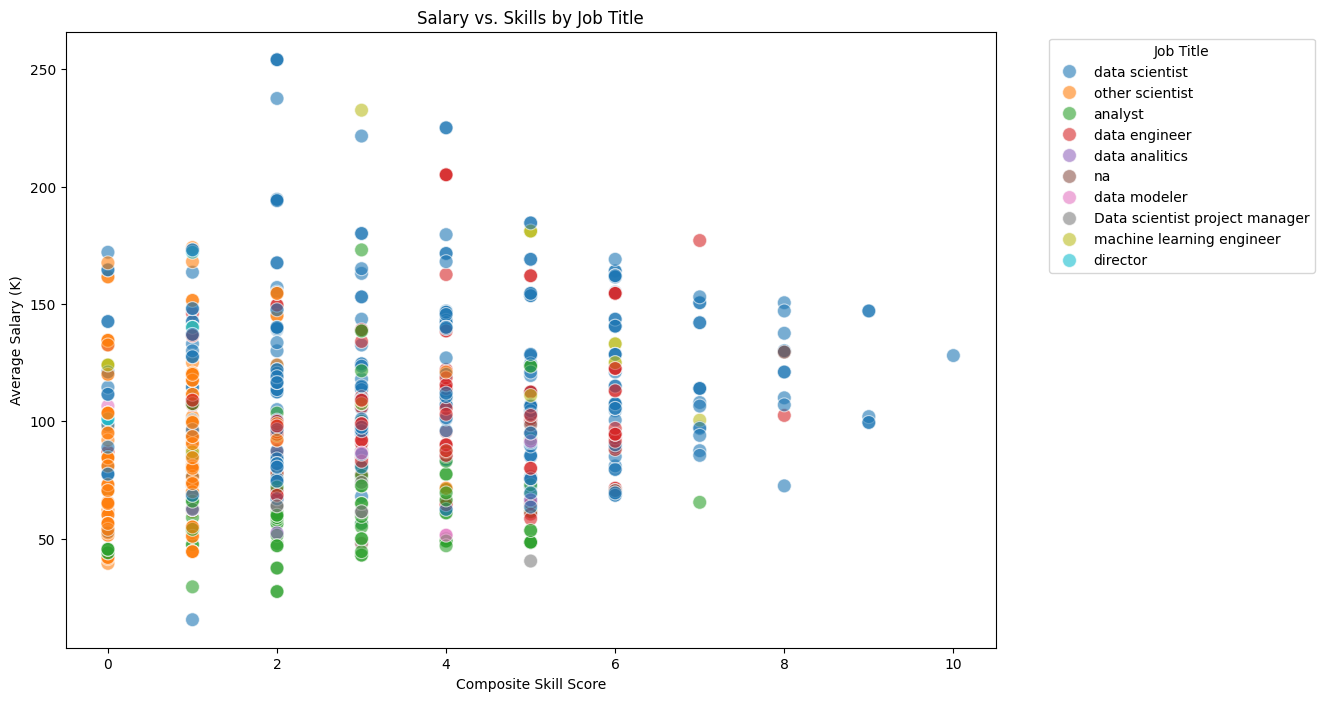

In [33]:
#Plotting Salaries and skills with Positions

# List of skills columns
skills_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
                  'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

# Create a composite skill score by summing up the skill columns
data2['skill_score'] = data2[skills_columns].sum(axis=1)

# Scatter plot with colors based on job titles
plt.figure(figsize=(12, 8))
sns.scatterplot(x='skill_score', y='Avg Salary(K)', hue='job_title_sim', data=data2, palette='tab10', s=100, alpha=0.6)
plt.title('Salary vs. Skills by Job Title')
plt.xlabel('Composite Skill Score')
plt.ylabel('Average Salary (K)')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

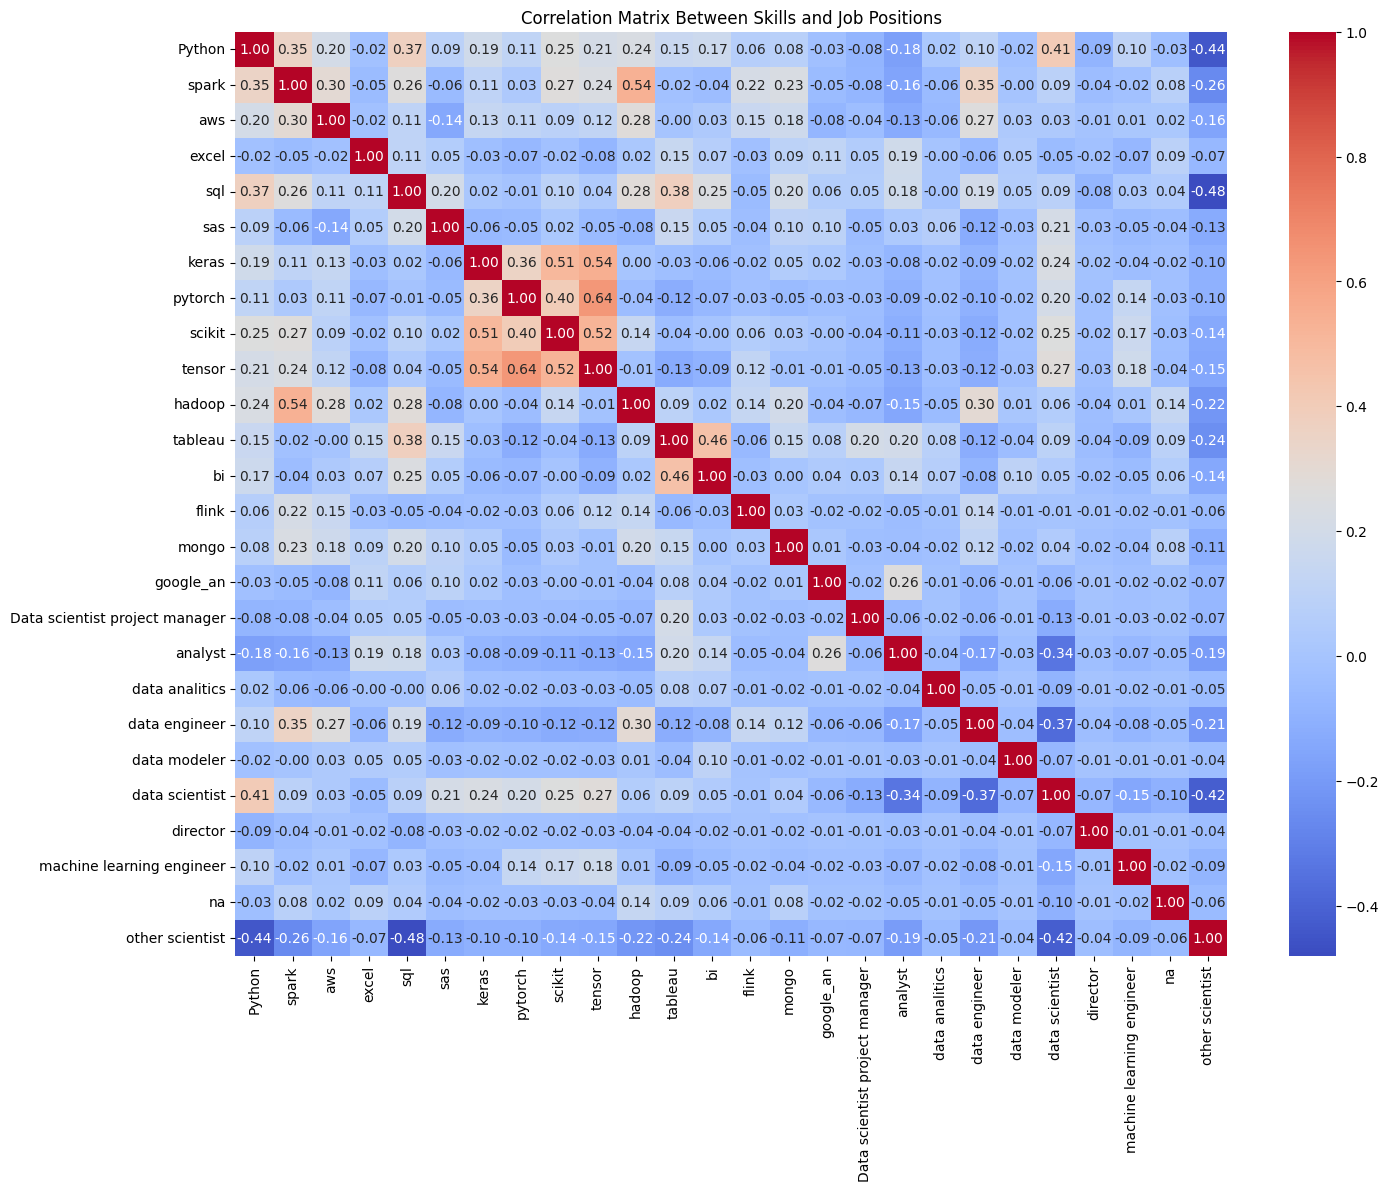

In [34]:
#show correlation of positions and skills

import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encode the job positions
job_positions_encoded = pd.get_dummies(data2['job_title_sim'])

# Combine skills and job positions into one DataFrame
combined_data = pd.concat([data2[skills_columns], job_positions_encoded], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and labels for clarity
plt.title('Correlation Matrix Between Skills and Job Positions')
plt.show()

In [35]:
data2.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree', 'cluster', 'pc1',
       'pc2', 'skill_score'],
      dtype='object')

In [36]:

columns_to_select = ['Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'skill_score']

# Selecting the specified columns and creating data3 DataFrame
data3 = data2[columns_to_select]

# Displaying the first 10 rows of data3
print(data3.head(10))


          Location    Headquarters          Size  Founded   Type of ownership  \
0  Albuquerque, NM      Goleta, CA   501 - 1000      1973   Company - Private   
1    Linthicum, MD   Baltimore, MD       10000+      1984  Other Organization   
2   Clearwater, FL  Clearwater, FL   501 - 1000      2010   Company - Private   
3     Richland, WA    Richland, WA  1001 - 5000      1965          Government   
4     New York, NY    New York, NY     51 - 200      1998   Company - Private   
5       Dallas, TX      Dallas, TX    201 - 500      2000    Company - Public   
6    Baltimore, MD   Baltimore, MD   501 - 1000      2008   Company - Private   
7     San Jose, CA     Seattle, WA    201 - 500      2005   Company - Private   
8    Rochester, NY   Rochester, NY       10000+      2014            Hospital   
9     New York, NY    New York, NY     51 - 200      2009   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense    

In [37]:
data2["skill_score"]

0      5
1      1
2      5
3      1
4      4
      ..
737    1
738    5
739    1
740    1
741    1
Name: skill_score, Length: 742, dtype: int64

In [48]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size',
       'company_location_grouped', 'remote_category', 'job_category'],
      dtype='object')

   Avg Salary(K)  Data scientist project manager  analyst  data analitics  \
0           72.0                           False    False           False   
1           87.5                           False    False           False   
2           85.0                           False    False           False   
3           76.5                           False    False           False   
4          114.5                           False    False           False   

   data engineer  data modeler  data scientist  director  \
0          False         False            True     False   
1          False         False            True     False   
2          False         False            True     False   
3          False         False            True     False   
4          False         False            True     False   

   machine learning engineer     na  other scientist  
0                      False  False            False  
1                      False  False            False  
2          

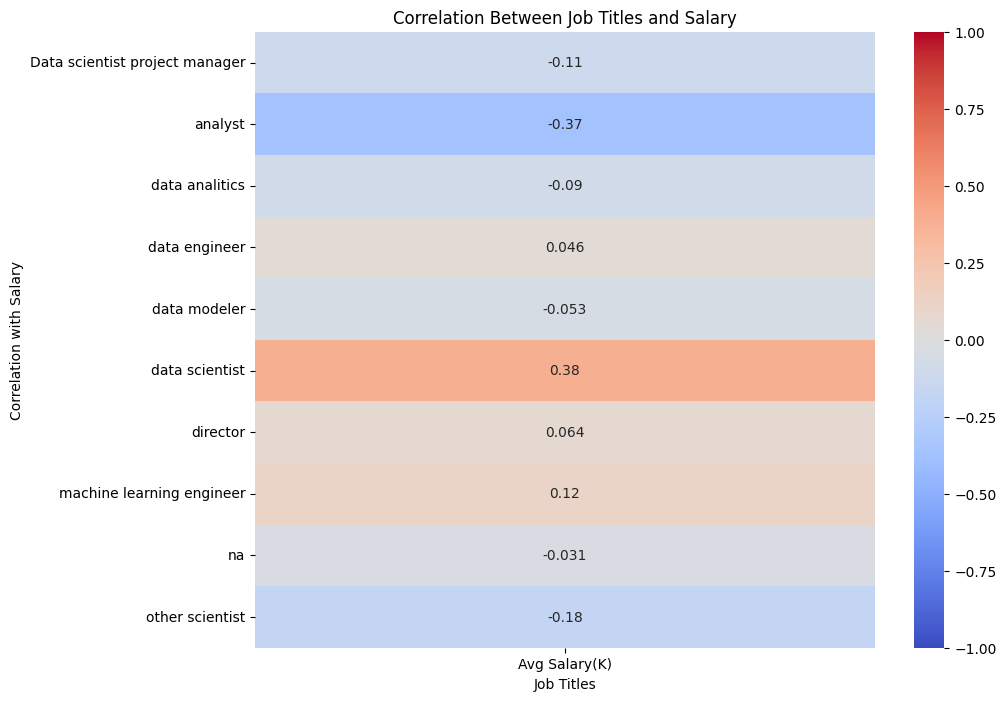

In [38]:
#show correlation between position and salary

# Combine salary and job positions into one DataFrame
combined_data = pd.concat([data2[['Avg Salary(K)']], job_positions_encoded], axis=1)

# Display the combined DataFrame
print(combined_data.head())

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Display the correlation matrix for the salary column
salary_correlation = correlation_matrix['Avg Salary(K)'].drop('Avg Salary(K)')
print(salary_correlation)


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap for the salary correlation
sns.heatmap(salary_correlation.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title and labels for clarity
plt.title('Correlation Between Job Titles and Salary')
plt.xlabel('Job Titles')
plt.ylabel('Correlation with Salary')
plt.show()


##job offers per company name, per company size, per industry##


In [50]:
data2.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Size', 'Founded', 'Type of ownership', 'Industry',
       ...
       'Headquarters_ce', 'Headquarters_da', 'Headquarters_ea',
       'Headquarters_ia', 'Headquarters_in', 'Headquarters_na',
       'Headquarters_nd', 'Headquarters_ny', 'Headquarters_om',
       'Headquarters_um'],
      dtype='object', length=126)

In [64]:
# Load the data again from the specified path
data_path = "/home/raphaelrousseau/code/datschman/DataScientist/raw_data/data_cleaned_2021.csv"
data3 = pd.read_csv(data_path)
data3

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


In [67]:


# Create the skill_score column by summing the specified skill columns
skills_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
                  'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
data3['skill_score'] = data3[skills_columns].sum(axis=1)

# Display the first few rows to ensure the skill_score column is created correctly
print(data3[['skill_score', 'Avg Salary(K)']].head())


   skill_score  Avg Salary(K)
0            5           72.0
1            1           87.5
2            5           85.0
3            1           76.5
4            4          114.5


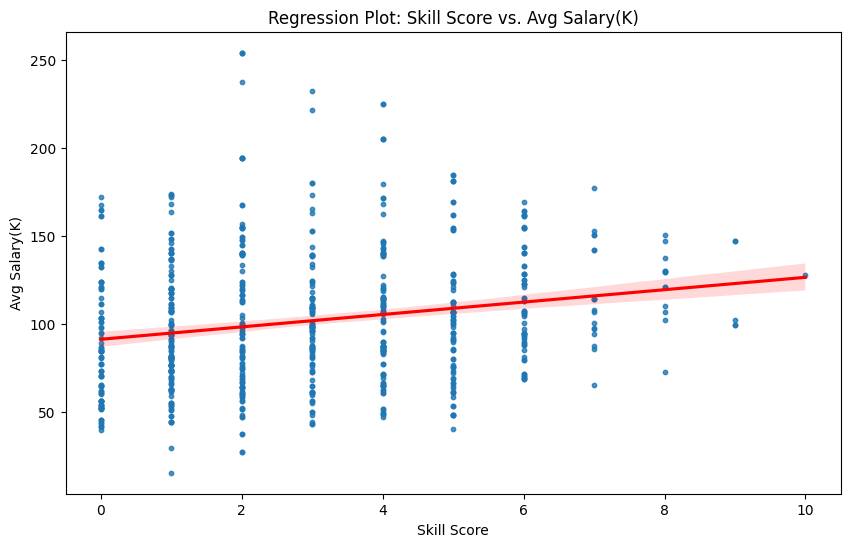

In [68]:
# Plot the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='skill_score', y='Avg Salary(K)', data=data3, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regression Plot: Skill Score vs. Avg Salary(K)')
plt.xlabel('Skill Score')
plt.ylabel('Avg Salary(K)')
plt.show()

api-file.py :


from fastapi import FastAPI
import pickle
from .models import DummyModel
import sys
import os

sys.path.append(os.path.dirname(os.path.abspath(__file__)))

app = FastAPI()

@app.get("/")
def root():
    return {"greeting": "bonsoir"}

@app.get("/predict")
def predict(experience_level: int = 1, country: int = 1):
    with open("package_folder/models/dummy_model.pkl", "rb") as file:
        model = pickle.load(file)

    prediction = model.predict([[experience_level, country]])[0]

    return {"prediction": prediction}

create_dummy_model.py :

# package_folder/create_dummy_model.py
import os
import pickle
from models import DummyModel  # Import from models.py

# Ensure the directory exists
os.makedirs("package_folder/models", exist_ok=True)

class DummyModel:
    def predict(self, X):
        return [50000 for _ in X]

model = DummyModel()

with open("package_folder/models/dummy_model.pkl", "wb") as file:
    pickle.dump(model, file)

app.py :

import streamlit as st
import requests

# Function to call the FastAPI prediction endpoint
def get_prediction(experience_level, country):
    url = "http://127.0.0.1:8000/predict"
    params = {
        "experience_level": experience_level,
        "country": country
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return float(response.json()["prediction"])  # Ensure the prediction is converted to a float
    else:
        return "Error: Could not get prediction"

# Streamlit app definition
def main():
    st.title('Data Scientist Salary Predictor')
    st.write("Predict your salary based on your experience level and other optional parameters.")

    # Input fields
    experience_level_map = {'Entry-level': 1, 'Mid-level': 2, 'Senior-level': 3}
    country_map = {'USA': 1, 'Canada': 2, 'UK': 3, 'Germany': 4, 'India': 5, 'Others': 6}

    experience_level = st.selectbox('Level of Experience', list(experience_level_map.keys()))
    tools = st.multiselect('Tools', ['Python', 'SQL', 'R', 'TensorFlow', 'Keras', 'Scikit-learn'])
    location = st.selectbox('Location', list(country_map.keys()))
    company_size = st.selectbox('Company Size', ['Small', 'Medium', 'Large'])

    if st.button('Predict Salary'):
        # Call the FastAPI endpoint for prediction
        predicted_salary = get_prediction(experience_level_map[experience_level], country_map[location])

        if isinstance(predicted_salary, str) and "Error" in predicted_salary:
            st.error(predicted_salary)
        else:
            st.markdown(
                f"<div style='background-color: #f0f0f0; padding: 10px; border-radius: 5px; text-align: center; font-size: 24px; font-weight: bold;'>"
                f"Predicted Salary: ${predicted_salary:,.2f}"
                f"</div>",
                unsafe_allow_html=True
            )

if __name__ == '__main__':
    main()

